## Five Personality Traits (OCEAN)

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a method of grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

 * Openness to experience (inventive/curious vs. consistent/cautious)
 * Conscientiousness (efficient/organized vs. easy-going/careless)
 * Extroversion (outgoing/energetic vs. solitary/reserved)
 * Agreeableness (friendly/compassionate vs. challenging/detached)
 * Neuroticism (sensitive/nervous vs. secure/confident)
 
 The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

1280px-Wiki-grafik_peats-de_big_five_ENG.png

## Purpose- to analyze the data with respect to different countries. 

## Load the data and import libraries 

In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
import time 
import numpy as np
import seaborn as sns
import os

In [94]:
data = pd.read_csv("Data_Big5.csv",sep="\t")

In [95]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


### Get some first info about the dataframe

In [96]:
data.shape

(1015341, 110)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


### Check for missing values

In [98]:
for i in data.columns: 
    print(i, data[i].isna().sum())

EXT1 1783
EXT2 1783
EXT3 1783
EXT4 1783
EXT5 1783
EXT6 1783
EXT7 1783
EXT8 1783
EXT9 1783
EXT10 1783
EST1 1783
EST2 1783
EST3 1783
EST4 1783
EST5 1783
EST6 1783
EST7 1783
EST8 1783
EST9 1783
EST10 1783
AGR1 1783
AGR2 1783
AGR3 1783
AGR4 1783
AGR5 1783
AGR6 1783
AGR7 1783
AGR8 1783
AGR9 1783
AGR10 1783
CSN1 1783
CSN2 1783
CSN3 1783
CSN4 1783
CSN5 1783
CSN6 1783
CSN7 1783
CSN8 1783
CSN9 1783
CSN10 1783
OPN1 1783
OPN2 1783
OPN3 1783
OPN4 1783
OPN5 1783
OPN6 1783
OPN7 1783
OPN8 1783
OPN9 1783
OPN10 1783
EXT1_E 1783
EXT2_E 1783
EXT3_E 1783
EXT4_E 1783
EXT5_E 1783
EXT6_E 1783
EXT7_E 1783
EXT8_E 1783
EXT9_E 1783
EXT10_E 1783
EST1_E 1783
EST2_E 1783
EST3_E 1783
EST4_E 1783
EST5_E 1783
EST6_E 1783
EST7_E 1783
EST8_E 1783
EST9_E 1783
EST10_E 1783
AGR1_E 1783
AGR2_E 1783
AGR3_E 1783
AGR4_E 1783
AGR5_E 1783
AGR6_E 1783
AGR7_E 1783
AGR8_E 1783
AGR9_E 1783
AGR10_E 1783
CSN1_E 1783
CSN2_E 1783
CSN3_E 1783
CSN4_E 1783
CSN5_E 1783
CSN6_E 1783
CSN7_E 1783
CSN8_E 1783
CSN9_E 1783
CSN10_E 1783
OPN1_E 1783

In [99]:
# use the median to fill in missing data- other option is delete surveys with empty data
#I chose to use median as it seems more robust
for i in data:
    if isinstance(data[i][2], str): continue
    data[i].fillna(data[i].median(),inplace=True)

In [100]:
# check again for missing values
for i in data.columns: 
    print(i, data[i].isna().sum())

EXT1 0
EXT2 0
EXT3 0
EXT4 0
EXT5 0
EXT6 0
EXT7 0
EXT8 0
EXT9 0
EXT10 0
EST1 0
EST2 0
EST3 0
EST4 0
EST5 0
EST6 0
EST7 0
EST8 0
EST9 0
EST10 0
AGR1 0
AGR2 0
AGR3 0
AGR4 0
AGR5 0
AGR6 0
AGR7 0
AGR8 0
AGR9 0
AGR10 0
CSN1 0
CSN2 0
CSN3 0
CSN4 0
CSN5 0
CSN6 0
CSN7 0
CSN8 0
CSN9 0
CSN10 0
OPN1 0
OPN2 0
OPN3 0
OPN4 0
OPN5 0
OPN6 0
OPN7 0
OPN8 0
OPN9 0
OPN10 0
EXT1_E 0
EXT2_E 0
EXT3_E 0
EXT4_E 0
EXT5_E 0
EXT6_E 0
EXT7_E 0
EXT8_E 0
EXT9_E 0
EXT10_E 0
EST1_E 0
EST2_E 0
EST3_E 0
EST4_E 0
EST5_E 0
EST6_E 0
EST7_E 0
EST8_E 0
EST9_E 0
EST10_E 0
AGR1_E 0
AGR2_E 0
AGR3_E 0
AGR4_E 0
AGR5_E 0
AGR6_E 0
AGR7_E 0
AGR8_E 0
AGR9_E 0
AGR10_E 0
CSN1_E 0
CSN2_E 0
CSN3_E 0
CSN4_E 0
CSN5_E 0
CSN6_E 0
CSN7_E 0
CSN8_E 0
CSN9_E 0
CSN10_E 0
OPN1_E 0
OPN2_E 0
OPN3_E 0
OPN4_E 0
OPN5_E 0
OPN6_E 0
OPN7_E 0
OPN8_E 0
OPN9_E 0
OPN10_E 0
dateload 0
screenw 0
screenh 0
introelapse 0
testelapse 0
endelapse 0
IPC 0
country 77
lat_appx_lots_of_err 0
long_appx_lots_of_err 0


In [101]:
data_clean = data.dropna() #drop surveys where the response was empty yet required a string
data_clean.isna().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
endelapse                0
IPC                      0
country                  0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 110, dtype: int64

## Curious where the participants are from

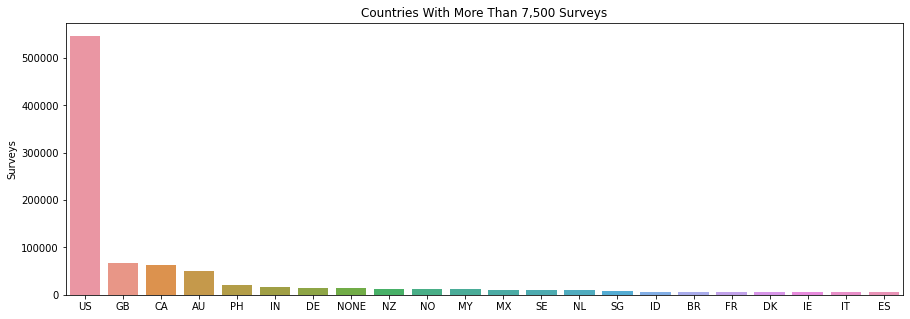

In [102]:
# Nationality distrib of surveys- Note majority of surveys were Americans
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 7,500 Surveys')
plt.ylabel('Surveys');

## Want to look at the questions in the survey

## Interesting observations

                  
                 1. the questions groups are formed such that in each group there exist positive and negative correlations.
                 2. the response "3" which indicates a failure to commit is predominately more common than other responses.
                 3. Approximately 85% of all participants were native english speakers

In [103]:
# Create dictionaries with qestions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}







In [104]:
# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [105]:
# Created a function to see the distrib of the answers to the survey
def distrib_questions(groupname, questions, color):
    plt.figure(figsize=(20,40))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.2)
        plt.title(questions[groupname[i-1]], fontsize=10)

Distribution of Responses to Extroversion Personality Questions


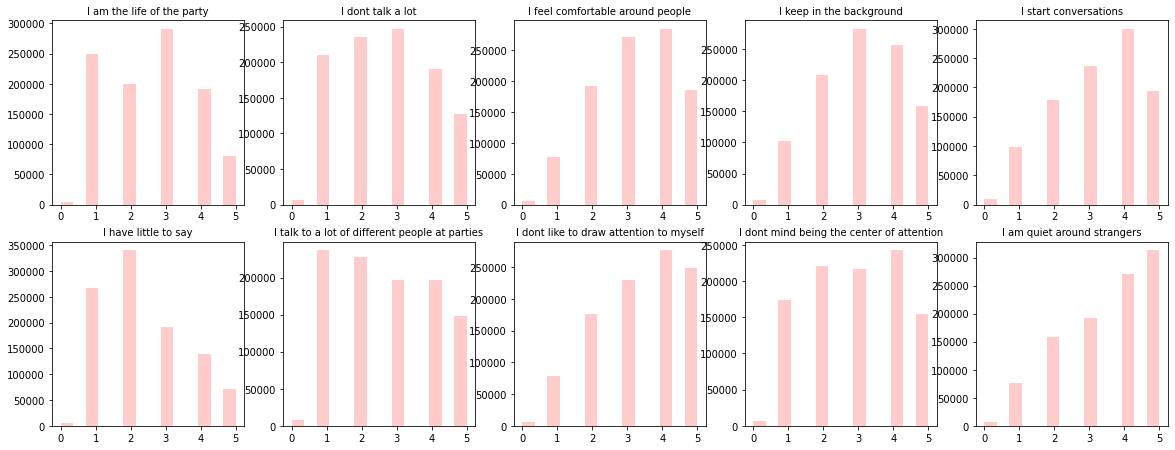

In [106]:
# interesting to note that for quest "I start conversations" most people answered with a 4
#also note that the survey was predom americans
print('Distribution of Responses to Extroversion Personality Questions')
distrib_questions(EXT, ext_questions, 'red')

Distribution of Responses to Neuroticism Personality Questions


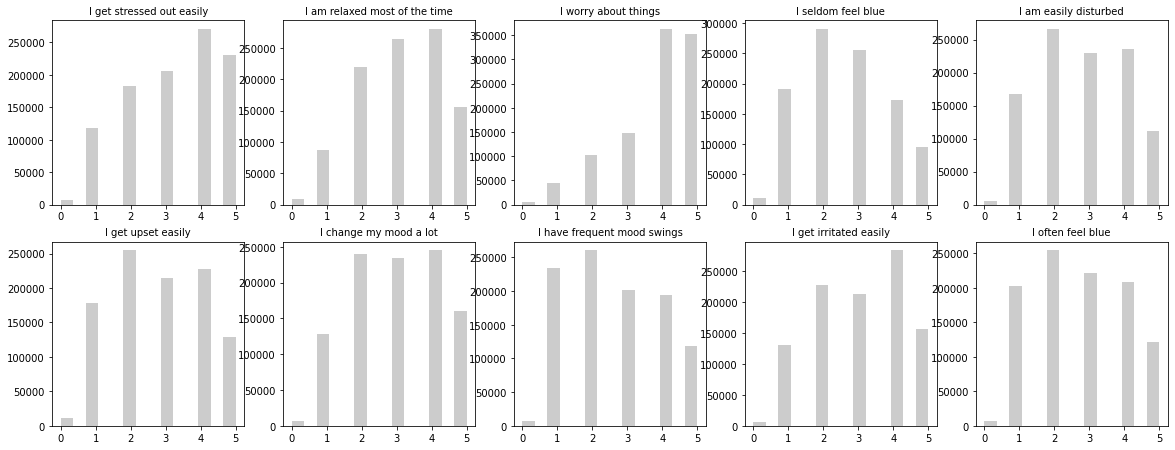

In [107]:
print('Distribution of Responses to Neuroticism Personality Questions')
distrib_questions(EST, est_questions, 'black')

Distribution of Responses to Agreeable Personality Questions


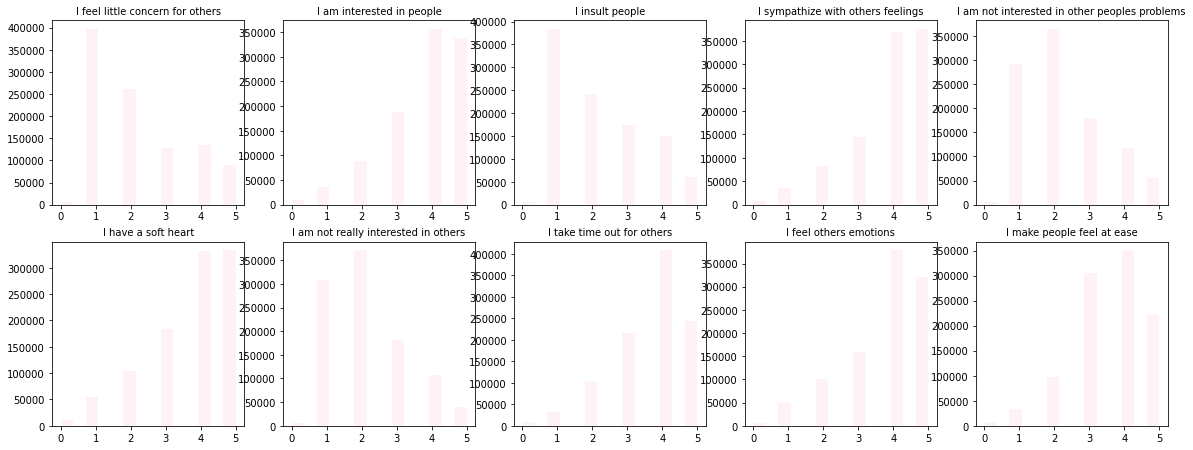

In [108]:
print('Distribution of Responses to Agreeable Personality Questions')
distrib_questions(AGR, agr_questions, 'pink')

Distribution of Responses to Conscientious Personality Questions


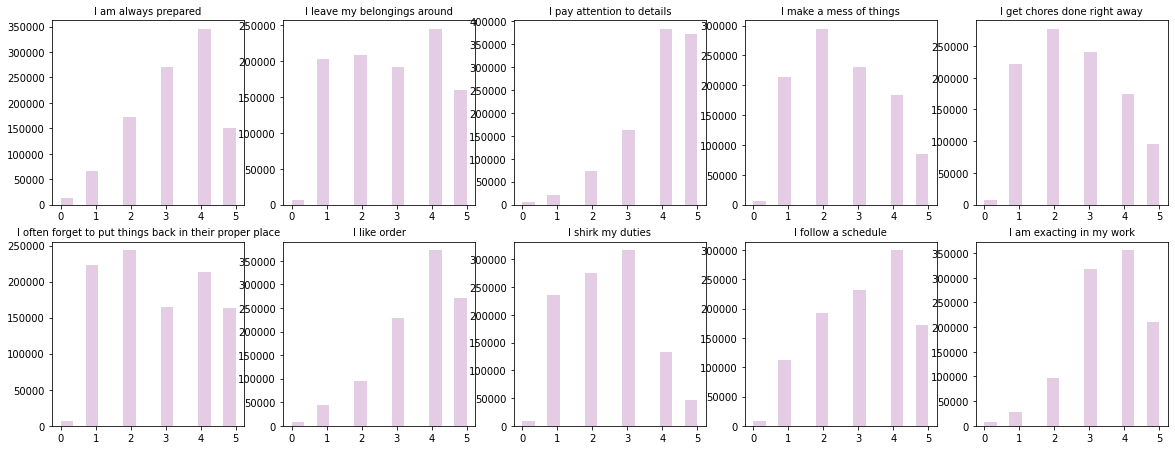

In [109]:
print('Distribution of Responses to Conscientious Personality Questions')
distrib_questions(CSN, csn_questions, 'purple')

Distribution of Responses to Open Personality Questions


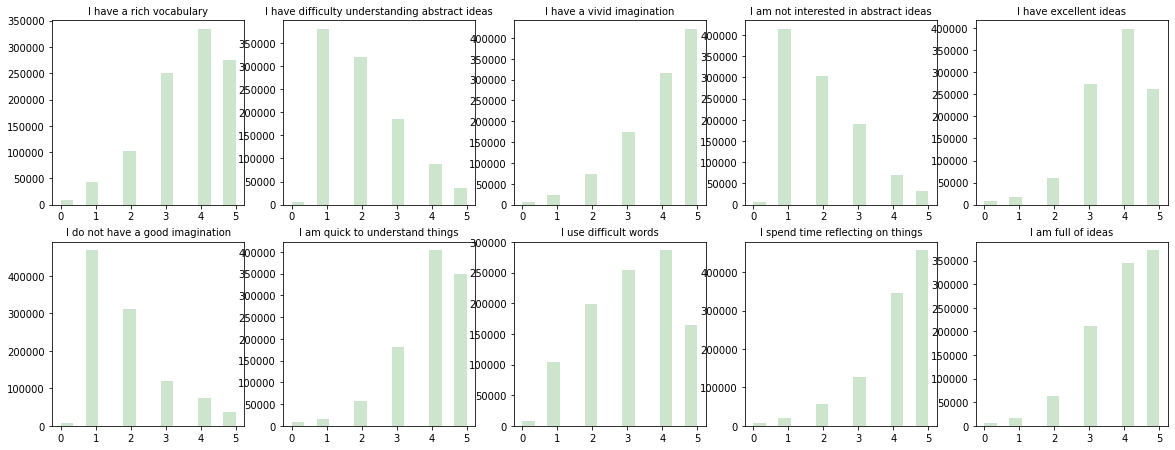

In [110]:
#Interesting that here the participants were more committed to their responses
print('Distribution of Responses to Open Personality Questions')
distrib_questions(OPN, opn_questions, 'green')

In [111]:
#you can see here that the questions in each category´s correlation: interesting that each are mixed
data.corr(method ='pearson') 

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
EXT1,1.000000,-0.439018,0.464610,-0.486641,0.477950,-0.323520,0.581646,-0.367791,0.470572,-0.410124,...,-0.001508,-0.000212,0.000621,0.000324,0.004796,-0.005125,0.001819,0.002248,-0.001178,0.054517
EXT2,-0.439018,1.000000,-0.412291,0.552444,-0.500523,0.541510,-0.444437,0.397735,-0.363999,0.490771,...,0.000041,-0.000651,-0.000314,-0.000281,-0.002666,0.003232,-0.002287,-0.001133,-0.001323,-0.026490
EXT3,0.464610,-0.412291,1.000000,-0.433337,0.554539,-0.321782,0.540797,-0.291803,0.422319,-0.433875,...,-0.001756,-0.000118,-0.000117,0.000992,0.031678,0.017810,0.000621,0.002165,-0.001759,0.051216
EXT4,-0.486641,0.552444,-0.433337,1.000000,-0.459626,0.457640,-0.465672,0.488432,-0.434476,0.538220,...,-0.000358,-0.000380,-0.001611,-0.001377,-0.012325,-0.003072,-0.001906,-0.002442,0.001420,-0.037777
EXT5,0.477950,-0.500523,0.554539,-0.459626,1.000000,-0.409509,0.588649,-0.312321,0.421613,-0.486974,...,-0.000763,0.000065,0.001220,-0.000405,0.009507,0.003840,0.001368,0.001461,0.001401,0.031148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
screenh,-0.005125,0.003232,0.017810,-0.003072,0.003840,-0.016813,-0.001969,0.004702,-0.004205,-0.016655,...,0.000006,-0.001253,-0.000688,-0.000124,0.730678,1.000000,0.000425,-0.001664,-0.001759,-0.001326
introelapse,0.001819,-0.002287,0.000621,-0.001906,0.001368,-0.002893,0.001624,-0.001817,0.001984,-0.002933,...,0.000005,-0.000040,0.005428,0.000012,-0.001549,0.000425,1.000000,0.064752,0.000910,-0.002214
testelapse,0.002248,-0.001133,0.002165,-0.002442,0.001461,-0.002340,0.002582,-0.002230,0.002724,-0.003054,...,0.031207,0.014062,0.021916,0.022768,-0.003606,-0.001664,0.064752,1.000000,0.004372,-0.000504
endelapse,-0.001178,-0.001323,-0.001759,0.001420,0.001401,-0.001177,-0.001104,-0.001997,0.001606,0.000954,...,-0.000012,0.000002,-0.000007,-0.000012,-0.000920,-0.001759,0.000910,0.004372,1.000000,-0.000184


In [112]:
data['EXT1'].value_counts()  #notice that most put down 3

3.0    290405
1.0    249711
2.0    199165
4.0    191638
5.0     80702
0.0      3720
Name: EXT1, dtype: int64

C:\Users\faria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXT1', ylabel='Density'>

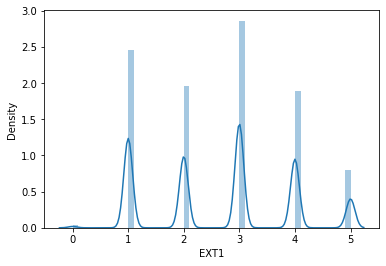

In [113]:
sns.distplot(data["EXT1"])

In [114]:
data['EXT2'].value_counts()  #more evenly distributed

3.0    246466
2.0    235528
1.0    210104
4.0    190216
5.0    126928
0.0      6099
Name: EXT2, dtype: int64

C:\Users\faria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXT2', ylabel='Density'>

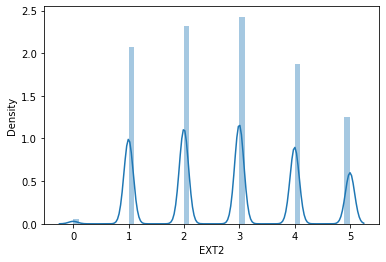

In [115]:
sns.distplot(data["EXT2"])

In [116]:
data['country'].value_counts() 

US    546403
GB     66596
CA     61849
AU     50030
PH     19847
       ...  
TD         1
KM         1
FK         1
MH         1
SH         1
Name: country, Length: 223, dtype: int64

In [149]:
X = data_clean.iloc[: , :100]
countries = data_clean["country"].tolist()
countries

['GB',
 'MY',
 'GB',
 'GB',
 'KE',
 'SE',
 'US',
 'MY',
 'GB',
 'FI',
 'UA',
 'PH',
 'FR',
 'GB',
 'AU',
 'IN',
 'CA',
 'NL',
 'ZA',
 'HK',
 'GB',
 'US',
 'GB',
 'BR',
 'AU',
 'CA',
 'GB',
 'AU',
 'GB',
 'GB',
 'SE',
 'CH',
 'FR',
 'FR',
 'GB',
 'GB',
 'TH',
 'GB',
 'GB',
 'GB',
 'IT',
 'AU',
 'FR',
 'IN',
 'ES',
 'IN',
 'FR',
 'IN',
 'FR',
 'AE',
 'HR',
 'US',
 'GR',
 'IE',
 'IN',
 'GB',
 'BR',
 'GB',
 'IN',
 'GB',
 'OM',
 'GB',
 'KE',
 'AU',
 'ES',
 'FR',
 'GB',
 'GB',
 'PH',
 'HK',
 'PH',
 'US',
 'HK',
 'DE',
 'GB',
 'GB',
 'AU',
 'IN',
 'GB',
 'PT',
 'GB',
 'GB',
 'DE',
 'HK',
 'GB',
 'NL',
 'GB',
 'GB',
 'NL',
 'CA',
 'NL',
 'GB',
 'GB',
 'PH',
 'SG',
 'GB',
 'NONE',
 'GB',
 'GB',
 'GB',
 'US',
 'GB',
 'RO',
 'IN',
 'US',
 'GB',
 'IN',
 'GB',
 'CA',
 'GB',
 'GB',
 'NO',
 'GB',
 'US',
 'GB',
 'NL',
 'GB',
 'US',
 'BD',
 'BN',
 'GB',
 'IN',
 'CA',
 'GB',
 'IN',
 'AU',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'PH',
 'DE',
 'PH',
 'GB',
 'PH',
 'SE',
 'DE',
 'IN',
 'AU',
 'ZA',
 'NO

In [150]:
print(X.shape)
print(len(countries))

(1015264, 100)
1015264


In [151]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X)  # trying to standard or normalize data (put in the same scale)

X = transformer.transform(X)

## First attempt to cluster the data with a given number of clusters. 
##### Then I check the clustering error with the inertia_ attribute.

## 1.	What is K-means?
A.	A clustering, unsupervised machine learning algorithm which tries to group similar items in the form of clusters.
The k-means algorithm aims to assign the data points in the data set to K distinct clusters.  After running the algorithm each observation (data point) will belong to the cluster whose center it is closest to.


In [152]:
from sklearn.cluster import KMeans

In [153]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [154]:
inertia = kmeans.inertia_ # number will not nec tell you something although smaller is better
print(inertia)

389247.40074817464


## Cluster analysis 

#### Here the steps that are at the basis of a simple cluster analysis. 

- First lets define a range where to vary the number of cluster say from 1 to 10. 


- Then, run the clustering algorithm for the given number of times 


- Plot the error (inertia) against the number of clusters used each time. 


- Use the elbow rule to determine the optimal number of clusters. 



Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters (K).

In [155]:
start =  time.time()
print('Start computation time: ', start)
ks = range(1, 10)
in_s = []
for i in ks: 
    model = KMeans(n_clusters=i, random_state=0)
    model.fit_predict(X, countries)
    
    in_i = model.inertia_
    in_s.append(in_i)
    print(i, in_i)
print('End computation time: ', time.time() - start)    

Start computation time:  1646931243.4116907
1 422118.1972658143
2 389247.40074817464
3 365215.7155535711
4 351093.0155562984
5 343862.8626336864
6 337508.20258067054
7 331220.5840256697
8 325345.6298070015
9 320049.4585157973
End computation time:  208.48915815353394


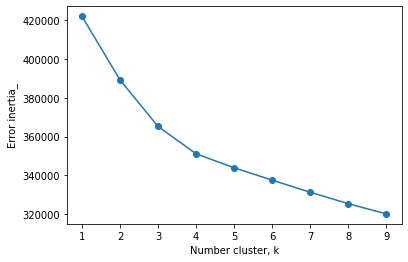

In [156]:
#appears that the optimal number of clusters is 4
plt.plot(ks, in_s, '-o')
plt.xlabel("Number cluster, k")
plt.ylabel("Error inertia_")
plt.show()

In [157]:
model2 = KMeans(n_clusters=4, random_state=0)

In [160]:
k_fit = kmeans.fit(X)

In [161]:
labels = model2.fit_predict(X)

In [162]:
df = pd.DataFrame({'labels':labels, 'countries':countries})

In [163]:
df['labels'].value_counts()

2    670289
3    150129
0    119406
1     75440
Name: labels, dtype: int64

In [164]:
df['countries'].value_counts()

US    546403
GB     66596
CA     61849
AU     50030
PH     19847
       ...  
TD         1
KM         1
FK         1
MH         1
SH         1
Name: countries, Length: 223, dtype: int64

In [165]:
ct = pd.crosstab(df['labels'], df['countries'])

In [166]:
ct

countries,AD,AE,AF,AG,AI,AL,AM,AO,AQ,AR,...,VG,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
labels,,,,,,,,,,,,,,,,,,,,,
0,2,503,5,0,0,69,24,2,0,553,...,0,8,383,0,3,0,3,307,4,11
1,0,266,7,2,1,33,7,1,0,287,...,0,1,215,0,0,0,2,283,8,13
2,12,1780,32,19,2,261,62,9,1,1923,...,2,33,1213,7,8,4,8,2708,74,61
3,3,512,10,3,1,73,16,2,1,391,...,1,10,526,0,0,3,1,453,12,18


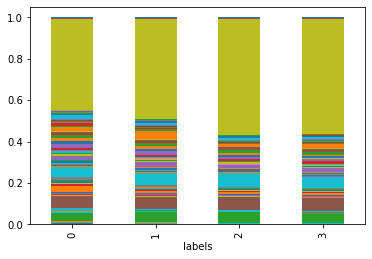

In [167]:
pd.crosstab(df.labels, df.countries, normalize='index').plot.bar(stacked=True).get_legend().remove()

In [134]:
# US contributed to more than 50% of the data set, followed by GB, Canada and Australia 
# all native english speaking countries 
df['countries'].value_counts() 



US    546403
GB     66596
CA     61849
AU     50030
PH     19847
       ...  
TD         1
KM         1
FK         1
MH         1
SH         1
Name: countries, Length: 223, dtype: int64

In [135]:
df.countries.value_counts()

US    546403
GB     66596
CA     61849
AU     50030
PH     19847
       ...  
TD         1
KM         1
FK         1
MH         1
SH         1
Name: countries, Length: 223, dtype: int64

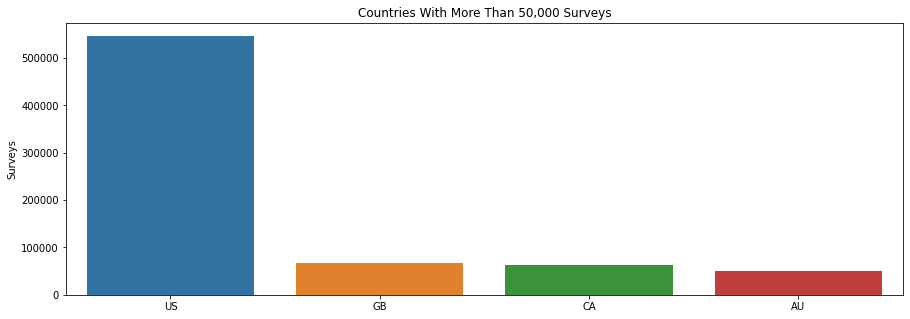

In [136]:
# Looking at these countries
countries = pd.DataFrame(data['country'].value_counts())
countries_contrib = countries[countries['country'] >= 50000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_contrib, x=countries_contrib.index, y='country')
plt.title('Countries With More Than 50,000 Surveys')
plt.ylabel('Surveys');

In [137]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(X)

## Conclusion
I am very interested in exploring more ofthis dataset because I have concern about the fact that this dataset represents mainly Americans/ native english speakers.  Given the importance of this dataset in terms of further data science exploration, I am concerned with the possibility of that the data does not truly account for the all people that it is being applied to.

It is apparent to me that this Big5 Model is used in various research such as the research smartphone usage, Facebook recognition of personality types based on likes